In [104]:
import pandas as pd
import numpy as np

In [105]:
# What are vectorized operation
a =np.array([1,2,3,4])
a*4

array([ 4,  8, 12, 16])

In [106]:
# Problem in Vectorize operation in vannila python(not work on None data)
s = ['cat','mat',None,'rat']
#[i.startwith('c') for i in s]

In [107]:
# How Pandas solve this

s = pd.Series(['cat','mat',None,'rat'])
# string access
s.str.startswith('c')

0     True
1    False
2     None
3    False
dtype: object

In [108]:
# import titanic

df = pd.read_csv('titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [109]:
# Common function

#lower/upper/capitalize/title
df['Name'].str.lower()
df['Name'].str.upper()
df['Name'].str.capitalize()
df['Name'].str.title() # first letter of every word is capital

#len
df['Name'].str.len().max()
df['Name'][df['Name'].str.len() == 82].value_counts()

#strip
df['Name'].str.strip() # remove useless gaps front and back

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [110]:
# split -> get

df['Name'].str.split(',').str.get(1) # once try with gap also place of ','

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: Name, Length: 891, dtype: object

In [111]:
#Slicing 
df['Name'].str[:4] #first 4 char of each Name

0      Brau
1      Cumi
2      Heik
3      Futr
4      Alle
       ... 
886    Mont
887    Grah
888    John
889    Behr
890    Dool
Name: Name, Length: 891, dtype: object

# TimeStamp 

the time stamp referse particular moments in time ( eg. oct, 2024 at 7:00pm)

In [112]:
# Creating time stamps (YY/MM/DD)
pd.Timestamp(2023/1/5)

Timestamp('1970-01-01 00:00:00.000000404')

In [113]:
# Variations 
pd.Timestamp('2023-1-5')

Timestamp('2023-01-05 00:00:00')

In [114]:
# Only year 
pd.Timestamp('2023')

Timestamp('2023-01-01 00:00:00')

In [115]:
# using text 
pd.Timestamp('5 january 2023')

Timestamp('2023-01-05 00:00:00')

In [116]:
# Providing Time also 
pd.Timestamp('5th january 2023 3:21PM')

Timestamp('2023-01-05 15:21:00')

In [117]:
# Usign Date and Time Object 
import datetime as dt
x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x


Timestamp('2023-01-05 09:21:56')

In [118]:
# fetch attributes 
x.year
x.month
x.day
x.second

56

In [119]:
# why seperate obj to handle date and time when python alredy has a datetime functionality?

1) syntax wise dtetime is very convenient

2) but it is slow so Numpy team make DateTime64 for fast 

In [120]:
date = np.array('2015-07-04',dtype=np.datetime64)
date
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

## Date Time Index

single date --> TimeStamp

multiple date --> DatetimeIndex

In [121]:
pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1'])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [122]:
# Using pd.timestamp 

dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])
dt_index


DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [123]:
# using date time series as index
pd.Series([1,2,3],index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

In [124]:
# Date_range function 
#generate daily dates in a given range
pd.date_range(start='2023/1/5',end='2023/2/28',freq='D') #if we write 2D then alternate day will get

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
               '2023-02-26', '2023-02-27', '2023-02-28'],
              dtype

In [125]:
pd.date_range(start='2023/1/5',end='2023/1/28',freq='B') #B tell only busines day means mon-fri

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27'],
              dtype='datetime64[ns]', freq='B')

In [126]:
# W-> one of everry week
pd.date_range(start='2023/1/5',end='2023/2/28',freq='W-Thu')

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26',
               '2023-02-02', '2023-02-09', '2023-02-16', '2023-02-23'],
              dtype='datetime64[ns]', freq='W-THU')

In [127]:
# H -> Hourly Data(factor)
pd.date_range(start='2023/1/5',end='2023/2/28',freq='6H')

C:\Users\Asus\AppData\Local\Temp\ipykernel_7180\1149842309.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2023/1/5',end='2023/2/28',freq='6H')


DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 06:00:00',
               '2023-01-05 12:00:00', '2023-01-05 18:00:00',
               '2023-01-06 00:00:00', '2023-01-06 06:00:00',
               '2023-01-06 12:00:00', '2023-01-06 18:00:00',
               '2023-01-07 00:00:00', '2023-01-07 06:00:00',
               ...
               '2023-02-25 18:00:00', '2023-02-26 00:00:00',
               '2023-02-26 06:00:00', '2023-02-26 12:00:00',
               '2023-02-26 18:00:00', '2023-02-27 00:00:00',
               '2023-02-27 06:00:00', '2023-02-27 12:00:00',
               '2023-02-27 18:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=217, freq='6h')

In [128]:
# M-> Month End 
pd.date_range(start='2023/1/5',end='2023/2/28',freq='M')

C:\Users\Asus\AppData\Local\Temp\ipykernel_7180\955789605.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2023/1/5',end='2023/2/28',freq='M')


DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='ME')

In [129]:
# MS -> Month Start 
# A -> Year end 

In [130]:
# Using periods(number of result)
pd.date_range(start='2023/1/5',periods=25,freq='D') # give next 25 days

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='D')

# To_Datetime Function 

convert an existing objects to pandas timestamp/datetimeIndex object

In [131]:
# Simple series example
s = pd.Series(['2023/1/1','2021/1/1'])
#s.str.split('/')
pd.to_datetime(s).dt.day #can give day,year,dday_name()

0    1
1    1
dtype: int32

In [132]:
# with errors
s = pd.Series(['2023/1/1','2021/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce') # skip error data 130 as month

0   2023-01-01
1   2021-01-01
2          NaT
dtype: datetime64[ns]

In [133]:
df = pd.read_csv('expense_data.csv')
df.shape

(277, 11)

In [134]:
df.head()

Date               Account        Category  Subcategory  \
0  3/2/2022 10:11  CUB - online payment            Food          NaN   
1  3/2/2022 10:11  CUB - online payment           Other          NaN   
2  3/1/2022 19:50  CUB - online payment            Food          NaN   
3  3/1/2022 18:56  CUB - online payment  Transportation          NaN   
4  3/1/2022 18:22  CUB - online payment            Food          NaN   

               Note    INR Income/Expense  Note.1  Amount Currency  Account.1  
0           Brownie   50.0        Expense     NaN    50.0      INR       50.0  
1  To lended people  300.0        Expense     NaN   300.0      INR      300.0  
2            Dinner   78.0        Expense     NaN    78.0      INR       78.0  
3             Metro   30.0        Expense     NaN    30.0      INR       30.0  
4            Snacks   67.0        Expense     NaN    67.0      INR       67.0

In [136]:
# convert into date time 
df['Date'] = pd.to_datetime(df['Date'])

In [137]:
# Accessor object for date time like properties of the Series values

df['Date'].dt.is_quarter_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

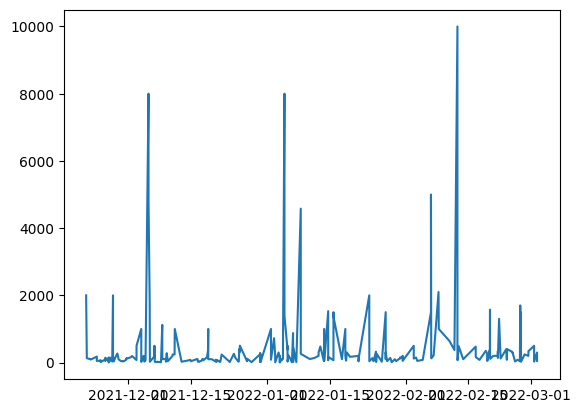

In [142]:
# plot graph 
import matplotlib.pyplot as plt 
plt.plot(df['Date'],df['INR'])

In [144]:
# Day name wise bar chart/month wise bar chart 
df['day_name'] = df['Date'].dt.day_name()
df.head()

Date               Account        Category  Subcategory  \
0 2022-03-02 10:11:00  CUB - online payment            Food          NaN   
1 2022-03-02 10:11:00  CUB - online payment           Other          NaN   
2 2022-03-01 19:50:00  CUB - online payment            Food          NaN   
3 2022-03-01 18:56:00  CUB - online payment  Transportation          NaN   
4 2022-03-01 18:22:00  CUB - online payment            Food          NaN   

               Note    INR Income/Expense  Note.1  Amount Currency  Account.1  \
0           Brownie   50.0        Expense     NaN    50.0      INR       50.0   
1  To lended people  300.0        Expense     NaN   300.0      INR      300.0   
2            Dinner   78.0        Expense     NaN    78.0      INR       78.0   
3             Metro   30.0        Expense     NaN    30.0      INR       30.0   
4            Snacks   67.0        Expense     NaN    67.0      INR       67.0   

    day_name  
0  Wednesday  
1  Wednesday  
2    Tuesday  
3    Tuesday  
4    Tuesday

<Axes: xlabel='day_name'>

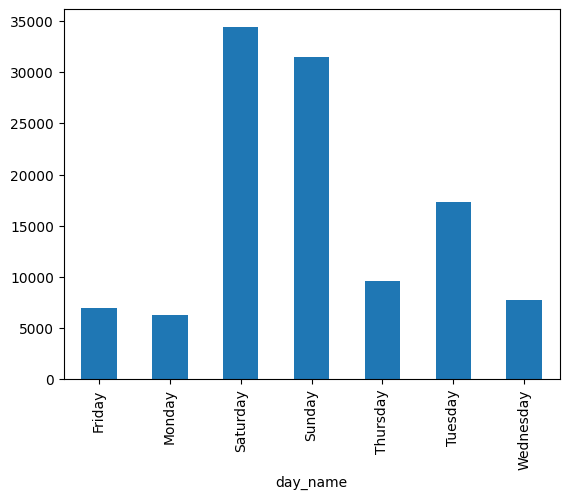

In [145]:
df.groupby('day_name')['INR'].sum().plot(kind='bar')